In [2]:
!pip install pandas ortools

In [4]:
# Step 1: Imports and Weekly Timetable Data Setup
# Using UK spelling in comments throughout for consistency.

# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# This project models my weekly schedule to optimise study and gym time
# while considering fixed commitments like work and lectures.

# I will create a DataFrame containing my weekly timetable.
# Each row represents one event (class, work, gym, study, commute, etc.)

# Define my weekly timetable as a list of dictionaries:
# For simplicity, times are in 24-hour format strings, days as strings.

# Note:
# - 'fixed' events (work, lectures) cannot move.
# - 'flexible' events (gym, study) can be shifted to reduce idle/commute time.

timetable_data = [
    # Monday
    {'day': 'Monday', 'start': '06:00', 'end': '08:00', 'event': 'Workout', 'type': 'flexible'},
    {'day': 'Monday', 'start': '08:50', 'end': '10:45', 'event': 'Commute to Uni', 'type': 'commute'},
    {'day': 'Monday', 'start': '11:00', 'end': '13:00', 'event': 'CO1102 Lecture', 'type': 'fixed'},
    {'day': 'Monday', 'start': '13:00', 'end': '14:00', 'event': 'ADMA100 Support Session (changed to Independent Study)', 'type': 'fixed'},
    {'day': 'Monday', 'start': '14:00', 'end': '15:00', 'event': 'Lunch', 'type': 'fixed'},
    {'day': 'Monday', 'start': '15:00', 'end': '16:00', 'event': 'MA1114 Lecture', 'type': 'fixed'},
    {'day': 'Monday', 'start': '16:00', 'end': '18:00', 'event': 'MA1061 Lecture', 'type': 'fixed'},
    {'day': 'Monday', 'start': '18:00', 'end': '20:30', 'event': 'Commute Home', 'type': 'commute'},
    {'day': 'Monday', 'start': '21:00', 'end': '22:00', 'event': 'Light Catch-up Study', 'type': 'flexible'},
    
    # Tuesday
    {'day': 'Tuesday', 'start': '07:30', 'end': '09:30', 'event': 'Gym', 'type': 'flexible'},
    {'day': 'Tuesday', 'start': '10:00', 'end': '12:00', 'event': 'MA1014 Revision', 'type': 'flexible'},
    {'day': 'Tuesday', 'start': '12:00', 'end': '13:30', 'event': 'Lunch and Chores', 'type': 'fixed'},
    {'day': 'Tuesday', 'start': '14:00', 'end': '15:00', 'event': 'CO1102 Study', 'type': 'flexible'},
    {'day': 'Tuesday', 'start': '15:30', 'end': '16:30', 'event': 'Commute to Work', 'type': 'commute'},
    {'day': 'Tuesday', 'start': '16:45', 'end': '19:00', 'event': 'Work Shift', 'type': 'fixed'},
    {'day': 'Tuesday', 'start': '19:15', 'end': '20:15', 'event': 'Commute Home', 'type': 'commute'},
    {'day': 'Tuesday', 'start': '21:00', 'end': '22:00', 'event': 'MA1061 Recap', 'type': 'flexible'},
    
    # Wednesday
    {'day': 'Wednesday', 'start': '06:00', 'end': '08:00', 'event': 'Workout', 'type': 'flexible'},
    {'day': 'Wednesday', 'start': '08:50', 'end': '10:45', 'event': 'Commute to Uni', 'type': 'commute'},
    {'day': 'Wednesday', 'start': '11:00', 'end': '12:00', 'event': 'MA1014 Lecture', 'type': 'fixed'},
    {'day': 'Wednesday', 'start': '12:00', 'end': '13:00', 'event': 'MA1061 Lecture', 'type': 'fixed'},
    {'day': 'Wednesday', 'start': '13:00', 'end': '15:30', 'event': 'Commute to Work', 'type': 'commute'},
    {'day': 'Wednesday', 'start': '16:00', 'end': '20:00', 'event': 'Work Shift', 'type': 'fixed'},
    {'day': 'Wednesday', 'start': '20:15', 'end': '22:00', 'event': 'Commute Home and Relax', 'type': 'commute'},
    
    # Thursday
    {'day': 'Thursday', 'start': '06:30', 'end': '07:15', 'event': 'Get Ready', 'type': 'fixed'},
    {'day': 'Thursday', 'start': '07:15', 'end': '09:00', 'event': 'Commute to Uni', 'type': 'commute'},
    {'day': 'Thursday', 'start': '09:00', 'end': '10:00', 'event': 'MA1114 Study', 'type': 'flexible'},
    {'day': 'Thursday', 'start': '10:00', 'end': '12:00', 'event': 'CO1102 Lecture', 'type': 'fixed'},
    {'day': 'Thursday', 'start': '12:00', 'end': '13:00', 'event': 'MA1014 Lecture', 'type': 'fixed'},
    {'day': 'Thursday', 'start': '13:00', 'end': '15:30', 'event': 'Commute to Work', 'type': 'commute'},
    {'day': 'Thursday', 'start': '16:00', 'end': '19:00', 'event': 'Work Shift', 'type': 'fixed'},
    {'day': 'Thursday', 'start': '19:15', 'end': '20:15', 'event': 'Commute Home', 'type': 'commute'},
    {'day': 'Thursday', 'start': '20:15', 'end': '21:30', 'event': 'Workout', 'type': 'flexible'},
    
    # Friday
    {'day': 'Friday', 'start': '07:30', 'end': '09:30', 'event': 'Workout', 'type': 'flexible'},
    {'day': 'Friday', 'start': '09:30', 'end': '12:00', 'event': 'Revision (various modules)', 'type': 'flexible'},
    {'day': 'Friday', 'start': '12:00', 'end': '14:00', 'event': 'Lunch and Chores', 'type': 'fixed'},
    {'day': 'Friday', 'start': '14:00', 'end': '18:00', 'event': 'Revision (various modules)', 'type': 'flexible'},
    
    # Saturday
    {'day': 'Saturday', 'start': '06:30', 'end': '07:30', 'event': 'Workout', 'type': 'flexible'},
    {'day': 'Saturday', 'start': '08:30', 'end': '09:20', 'event': 'Commute to Work', 'type': 'commute'},
    {'day': 'Saturday', 'start': '09:30', 'end': '14:30', 'event': 'Work Shift', 'type': 'fixed'},
    {'day': 'Saturday', 'start': '16:00', 'end': '18:00', 'event': 'Lunch and Relax', 'type': 'fixed'},
    {'day': 'Saturday', 'start': '18:30', 'end': '21:30', 'event': 'Coding & Independent Study', 'type': 'flexible'},
    
    # Sunday
    {'day': 'Sunday', 'start': '06:30', 'end': '08:30', 'event': 'Workout', 'type': 'flexible'},
    {'day': 'Sunday', 'start': '09:00', 'end': '10:00', 'event': 'Commute to Work', 'type': 'commute'},
    {'day': 'Sunday', 'start': '10:00', 'end': '15:00', 'event': 'Work Shift', 'type': 'fixed'},
    {'day': 'Sunday', 'start': '16:30', 'end': '18:00', 'event': 'Lunch and Relax', 'type': 'fixed'},
    {'day': 'Sunday', 'start': '18:00', 'end': '21:00', 'event': 'Coding & Independent Study', 'type': 'flexible'},
]

# Convert the timetable data to a DataFrame for easier processing
timetable_df = pd.DataFrame(timetable_data)

# Convert 'start' and 'end' columns to datetime objects (we use a fake date since I only care about time)
def time_to_datetime(time_str):
    return datetime.strptime(time_str, '%H:%M')

timetable_df['start_dt'] = timetable_df['start'].apply(time_to_datetime)
timetable_df['end_dt'] = timetable_df['end'].apply(time_to_datetime)

# Show the first few rows of the timetable to verify
timetable_df



,day,start,end,event,type,start_dt,end_dt
0,Monday,06:00,08:00,Workout,flexible,1900-01-01 06:00:00,1900-01-01 08:00:00
1,Monday,08:50,10:45,Commute to Uni,commute,1900-01-01 08:50:00,1900-01-01 10:45:00
2,Monday,11:00,13:00,CO1102 Lecture,fixed,1900-01-01 11:00:00,1900-01-01 13:00:00
3,Monday,13:00,14:00,ADMA100 Support Session (changed to Independen...,fixed,1900-01-01 13:00:00,1900-01-01 14:00:00
4,Monday,14:00,15:00,Lunch,fixed,1900-01-01 14:00:00,1900-01-01 15:00:00
5,Monday,15:00,16:00,MA1114 Lecture,fixed,1900-01-01 15:00:00,1900-01-01 16:00:00
6,Monday,16:00,18:00,MA1061 Lecture,fixed,1900-01-01 16:00:00,1900-01-01 18:00:00
7,Monday,18:00,20:30,Commute Home,commute,1900-01-01 18:00:00,1900-01-01 20:30:00
8,Monday,21:00,22:00,Light Catch-up Study,flexible,1900-01-01 21:00:00,1900-01-01 22:00:00
9,Tuesday,07:30,09:30,Gym,flexible,1900-01-01 07:30:00,1900-01-01 09:30:00


In [7]:
import pandas as pd

# Full week timetable data based on your info
data = [
    # Monday
    ['Monday', '06:00', '08:00', 'Workout', True],
    ['Monday', '08:50', '10:45', 'Commute to Uni', True],
    ['Monday', '11:00', '13:00', 'CO1102 Lecture', True],
    ['Monday', '13:00', '14:00', 'ADMA100 Independent Study', False],  # switched from support session
    ['Monday', '14:00', '15:00', 'Lunch', True],
    ['Monday', '15:00', '16:00', 'MA1114 Lecture', True],
    ['Monday', '16:00', '18:00', 'MA1061 Lecture', True],
    ['Monday', '18:00', '20:30', 'Commute Home', True],
    ['Monday', '21:00', '22:00', 'Light Study', False],

    # Tuesday
    ['Tuesday', '07:30', '09:30', 'Workout', True],
    ['Tuesday', '10:00', '12:00', 'MA1014 Revision', False],
    ['Tuesday', '12:00', '13:30', 'Lunch & Chores', True],
    ['Tuesday', '14:00', '15:00', 'CO1102 Study', False],
    ['Tuesday', '15:30', '16:30', 'Commute to Work', True],
    ['Tuesday', '16:45', '19:00', 'Work', True],
    ['Tuesday', '19:15', '20:15', 'Commute Home', True],
    ['Tuesday', '21:00', '22:00', 'MA1061 Recap', False],

    # Wednesday
    ['Wednesday', '06:00', '08:00', 'Workout', True],
    ['Wednesday', '08:50', '10:45', 'Commute to Uni', True],
    ['Wednesday', '11:00', '12:00', 'MA1014 Lecture', True],
    ['Wednesday', '12:00', '13:00', 'MA1061 Lecture', True],
    ['Wednesday', '13:00', '15:30', 'Commute to Work', True],
    ['Wednesday', '16:00', '20:00', 'Work', True],
    ['Wednesday', '20:15', '21:15', 'Commute Home', True],
    ['Wednesday', '22:00', '23:00', 'Sleep', True],

    # Thursday
    ['Thursday', '06:30', '07:15', 'Wake & Leave Home', True],
    ['Thursday', '07:15', '09:00', 'Commute to Uni', True],
    ['Thursday', '09:00', '10:00', 'MA1114 Study', False],
    ['Thursday', '10:00', '12:00', 'CO1102 Lecture', True],
    ['Thursday', '12:00', '13:00', 'MA1014 Lecture', True],
    ['Thursday', '13:00', '15:30', 'Commute to Work', True],
    ['Thursday', '16:00', '19:00', 'Work', True],
    ['Thursday', '19:15', '20:15', 'Commute Home', True],
    ['Thursday', '20:15', '21:30', 'Workout', True],
    ['Thursday', '21:30', '22:00', 'Wind Down', False],

    # Friday
    ['Friday', '07:30', '09:30', 'Workout', True],
    ['Friday', '09:30', '12:00', 'Revision', False],
    ['Friday', '12:00', '14:00', 'Lunch & Chores', True],
    ['Friday', '14:00', '18:00', 'Revision', False],

    # Saturday
    ['Saturday', '06:30', '07:30', 'Workout', True],
    ['Saturday', '08:30', '09:20', 'Commute to Work', True],
    ['Saturday', '09:30', '14:30', 'Work', True],
    ['Saturday', '16:00', '18:00', 'Lunch & Relax', True],
    ['Saturday', '18:30', '21:30', 'Coding & Independent Study', False],

    # Sunday
    ['Sunday', '06:30', '08:30', 'Workout', True],
    ['Sunday', '09:00', '10:00', 'Commute to Work', True],
    ['Sunday', '10:00', '15:00', 'Work', True],
    ['Sunday', '16:30', '18:00', 'Lunch & Relax', True],
    ['Sunday', '18:30', '21:30', 'Coding & Independent Study', False],
]

timetable_df = pd.DataFrame(data, columns=['day', 'start_time', 'end_time', 'event', 'fixed'])

# Convert times
timetable_df['start_time'] = pd.to_datetime(timetable_df['start_time'], format='%H:%M')
timetable_df['end_time'] = pd.to_datetime(timetable_df['end_time'], format='%H:%M')

timetable_df

,day,start_time,end_time,event,fixed
0,Monday,1900-01-01 06:00:00,1900-01-01 08:00:00,Workout,True
1,Monday,1900-01-01 08:50:00,1900-01-01 10:45:00,Commute to Uni,True
2,Monday,1900-01-01 11:00:00,1900-01-01 13:00:00,CO1102 Lecture,True
3,Monday,1900-01-01 13:00:00,1900-01-01 14:00:00,ADMA100 Independent Study,False
4,Monday,1900-01-01 14:00:00,1900-01-01 15:00:00,Lunch,True
5,Monday,1900-01-01 15:00:00,1900-01-01 16:00:00,MA1114 Lecture,True
6,Monday,1900-01-01 16:00:00,1900-01-01 18:00:00,MA1061 Lecture,True
7,Monday,1900-01-01 18:00:00,1900-01-01 20:30:00,Commute Home,True
8,Monday,1900-01-01 21:00:00,1900-01-01 22:00:00,Light Study,False
9,Tuesday,1900-01-01 07:30:00,1900-01-01 09:30:00,Workout,True


In [8]:
import pandas as pd

# Calculate duration of each event in minutes
# This subtracts the start time from the end time, converts it to seconds, then to minutes
timetable_df['duration_mins'] = (timetable_df['end_time'] - timetable_df['start_time']).dt.total_seconds() / 60

# Show total time spent on each type of event across the week
#group by 'event' and sum durations
event_durations = timetable_df.groupby('event')['duration_mins'].sum().sort_values(ascending=False)

print("Total minutes spent on each event during the week:")
print(event_durations)

# Identify total commute time for the week
commute_events = timetable_df[timetable_df['event'].str.contains('Commute', case=False)]
total_commute = commute_events['duration_mins'].sum()

print(f"\nTotal commute time for the week: {total_commute:.1f} minutes ({total_commute/60:.2f} hours)")

# Identify total fixed gym and work time (marked True in 'fixed' column)
fixed_time = timetable_df[timetable_df['fixed'] == True]['duration_mins'].sum()
print(f"\nTotal fixed time (work, gym, commute): {fixed_time:.1f} minutes ({fixed_time/60:.2f} hours)")

# Calculate total free/independent study time (fixed == False)
free_time = timetable_df[timetable_df['fixed'] == False]['duration_mins'].sum()
print(f"\nTotal flexible/independent study time: {free_time:.1f} minutes ({free_time/60:.2f} hours)")

# Show a preview of the timetable with durations included
# Show the entire timetable with durations included
print(timetable_df.to_string())

Total minutes spent on each event during the week:
event
Work                          1155.0
Workout                        735.0
Commute to Work                470.0
Revision                       390.0
Coding & Independent Study     360.0
Commute to Uni                 335.0
Commute Home                   330.0
CO1102 Lecture                 240.0
Lunch & Chores                 210.0
Lunch & Relax                  210.0
MA1061 Lecture                 180.0
MA1014 Revision                120.0
MA1014 Lecture                 120.0
Lunch                           60.0
MA1061 Recap                    60.0
MA1114 Lecture                  60.0
MA1114 Study                    60.0
Light Study                     60.0
Sleep                           60.0
CO1102 Study                    60.0
ADMA100 Independent Study       60.0
Wake & Leave Home               45.0
Wind Down                       30.0
Name: duration_mins, dtype: float64

Total commute time for the week: 1135.0 minutes (18.92 

In [2]:
import pandas as pd
from datetime import datetime

# I’m defining my weekly timetable with all days and activities.
# Each dictionary entry represents one event with start and end times.
timetable_data = [
    # Monday
    {"day": "Monday", "event": "Wake up", "start_time": "07:00", "end_time": "07:30"},
    {"day": "Monday", "event": "Gym", "start_time": "07:30", "end_time": "09:30"},
    {"day": "Monday", "event": "MA1014 Revision", "start_time": "10:00", "end_time": "12:00"},
    {"day": "Monday", "event": "Lunch and chores", "start_time": "12:00", "end_time": "13:30"},
    {"day": "Monday", "event": "CO1102 Study", "start_time": "14:00", "end_time": "15:00"},
    {"day": "Monday", "event": "Get ready for work", "start_time": "15:15", "end_time": "15:30"},
    {"day": "Monday", "event": "Commute to work", "start_time": "15:30", "end_time": "16:30"},
    {"day": "Monday", "event": "Work", "start_time": "16:45", "end_time": "19:00"},
    {"day": "Monday", "event": "Commute home", "start_time": "19:15", "end_time": "20:15"},
    {"day": "Monday", "event": "Relax", "start_time": "20:15", "end_time": "21:00"},
    {"day": "Monday", "event": "MA1061 Recap", "start_time": "21:00", "end_time": "22:00"},
    {"day": "Monday", "event": "Sleep", "start_time": "22:00", "end_time": "07:00"},  # Overnight sleep
    
    # Tuesday (example)
    {"day": "Tuesday", "event": "Wake up", "start_time": "06:30", "end_time": "07:00"},
    {"day": "Tuesday", "event": "Free time / Breakfast", "start_time": "07:00", "end_time": "08:30"},
    {"day": "Tuesday", "event": "Study CO1102", "start_time": "09:00", "end_time": "10:30"},
    {"day": "Tuesday", "event": "Work", "start_time": "16:45", "end_time": "19:00"},
    {"day": "Tuesday", "event": "Commute home", "start_time": "19:00", "end_time": "20:00"},
    {"day": "Tuesday", "event": "Relax", "start_time": "20:00", "end_time": "22:00"},
    {"day": "Tuesday", "event": "Sleep", "start_time": "22:00", "end_time": "06:30"},
    
    # Wednesday
    {"day": "Wednesday", "event": "Wake up", "start_time": "07:00", "end_time": "07:30"},
    {"day": "Wednesday", "event": "University", "start_time": "08:00", "end_time": "16:30"},
    {"day": "Wednesday", "event": "Work", "start_time": "16:45", "end_time": "20:30"},
    {"day": "Wednesday", "event": "Sleep", "start_time": "22:00", "end_time": "07:00"},

    # Thursday
    {"day": "Thursday", "event": "Wake up", "start_time": "06:30", "end_time": "07:00"},
    {"day": "Thursday", "event": "University", "start_time": "08:00", "end_time": "16:30"},
    {"day": "Thursday", "event": "Work", "start_time": "16:45", "end_time": "19:00"},
    {"day": "Thursday", "event": "Commute home", "start_time": "19:00", "end_time": "20:00"},
    {"day": "Thursday", "event": "Relax", "start_time": "20:00", "end_time": "22:00"},
    {"day": "Thursday", "event": "Sleep", "start_time": "22:00", "end_time": "06:30"},
    
    # Friday
    {"day": "Friday", "event": "Wake up", "start_time": "07:00", "end_time": "07:30"},
    {"day": "Friday", "event": "Free time / Study", "start_time": "08:00", "end_time": "17:00"},
    {"day": "Friday", "event": "Relax", "start_time": "17:00", "end_time": "22:00"},
    {"day": "Friday", "event": "Sleep", "start_time": "22:00", "end_time": "07:00"},
    
    # Saturday
    {"day": "Saturday", "event": "Wake up", "start_time": "06:00", "end_time": "06:30"},
    {"day": "Saturday", "event": "Workout", "start_time": "06:30", "end_time": "08:30"},
    {"day": "Saturday", "event": "Work", "start_time": "09:00", "end_time": "15:00"},
    {"day": "Saturday", "event": "Relax and code", "start_time": "15:30", "end_time": "18:30"},
    {"day": "Saturday", "event": "Sleep", "start_time": "22:00", "end_time": "06:00"},
    
    # Sunday
    {"day": "Sunday", "event": "Wake up", "start_time": "06:00", "end_time": "06:30"},
    {"day": "Sunday", "event": "Workout", "start_time": "06:30", "end_time": "08:30"},
    {"day": "Sunday", "event": "Commute to work", "start_time": "09:00", "end_time": "10:00"},
    {"day": "Sunday", "event": "Work", "start_time": "10:00", "end_time": "15:00"},
    {"day": "Sunday", "event": "Commute home", "start_time": "15:00", "end_time": "16:30"},
    {"day": "Sunday", "event": "Relax and lunch", "start_time": "16:30", "end_time": "18:00"},
    {"day": "Sunday", "event": "Sleep", "start_time": "22:00", "end_time": "06:00"},
]

# I convert my string times into datetime.time objects so I can do maths on them easily.
df = pd.DataFrame(timetable_data)
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M").dt.time
df["end_time"] = pd.to_datetime(df["end_time"], format="%H:%M").dt.time

# Display the full timetable so I can check it looks right.
df

,day,event,start_time,end_time
0,Monday,Wake up,07:00:00,07:30:00
1,Monday,Gym,07:30:00,09:30:00
2,Monday,MA1014 Revision,10:00:00,12:00:00
3,Monday,Lunch and chores,12:00:00,13:30:00
4,Monday,CO1102 Study,14:00:00,15:00:00
5,Monday,Get ready for work,15:15:00,15:30:00
6,Monday,Commute to work,15:30:00,16:30:00
7,Monday,Work,16:45:00,19:00:00
8,Monday,Commute home,19:15:00,20:15:00
9,Monday,Relax,20:15:00,21:00:00


In [3]:
import pandas as pd
from datetime import datetime, timedelta

# I already have my timetable data in the 'df' DataFrame
# Here’s how I calculate the duration of each event in minutes.

def calculate_duration(row):
    start = datetime.strptime(row["start_time"].strftime("%H:%M"), "%H:%M")
    end = datetime.strptime(row["end_time"].strftime("%H:%M"), "%H:%M")
    # If the event ends before it starts, it means it goes past midnight
    if end <= start:
        end += timedelta(days=1)
    duration = end - start
    return duration.total_seconds() / 60  # duration in minutes

# I apply this function to each row to get the duration of each event
df["duration_minutes"] = df.apply(calculate_duration, axis=1)

# Now I can see how long each event lasts.
df

,day,event,start_time,end_time,duration_minutes
0,Monday,Wake up,07:00:00,07:30:00,30.0
1,Monday,Gym,07:30:00,09:30:00,120.0
2,Monday,MA1014 Revision,10:00:00,12:00:00,120.0
3,Monday,Lunch and chores,12:00:00,13:30:00,90.0
4,Monday,CO1102 Study,14:00:00,15:00:00,60.0
5,Monday,Get ready for work,15:15:00,15:30:00,15.0
6,Monday,Commute to work,15:30:00,16:30:00,60.0
7,Monday,Work,16:45:00,19:00:00,135.0
8,Monday,Commute home,19:15:00,20:15:00,60.0
9,Monday,Relax,20:15:00,21:00:00,45.0


In [4]:
# First, I create a new column 'category' to classify each event into a broader category
def classify_event(event):
    event_lower = event.lower()
    if "study" in event_lower or "lecture" in event_lower or "revision" in event_lower or "independent" in event_lower:
        return "Study"
    elif "work" in event_lower:
        return "Work"
    elif "commute" in event_lower:
        return "Commute"
    elif "workout" in event_lower or "gym" in event_lower:
        return "Gym"
    elif "sleep" in event_lower:
        return "Sleep"
    elif "chores" in event_lower or "relax" in event_lower or "wind down" in event_lower or "free" in event_lower:
        return "Free Time"
    else:
        return "Other"

# I apply this classification to each event
df['category'] = df['event'].apply(classify_event)

# Now I group by category and sum the durations to see total minutes per category
time_summary = df.groupby('category')['duration_minutes'].sum().reset_index()

# I convert minutes to hours for easier understanding
time_summary['hours'] = time_summary['duration_minutes'] / 60

# I sort by hours in descending order to see where I spend most time
time_summary = time_summary.sort_values(by='hours', ascending=False)

# Here’s my summary of how much time I spend on each category:
print(time_summary)

    category  duration_minutes  hours
4      Sleep            3600.0  60.00
6       Work            1665.0  27.75
3      Other            1290.0  21.50
1  Free Time            1035.0  17.25
5      Study             810.0  13.50
0    Commute             270.0   4.50
2        Gym             120.0   2.00


In [9]:
# Make a copy of my timetable so I don't change the original
optimized_df = df.copy()

# Reduce commute time by 30 mins per day (not going below zero)
optimized_df.loc[optimized_df['category'] == 'Commute', 'duration_minutes'] = \
    optimized_df.loc[optimized_df['category'] == 'Commute', 'duration_minutes'].apply(lambda x: max(x - 30, 0))

# Calculate total minutes saved from commute reduction
total_saved = df.loc[df['category'] == 'Commute', 'duration_minutes'].sum() - optimized_df.loc[optimized_df['category'] == 'Commute', 'duration_minutes'].sum()

# Count how many study sessions there are to add saved time to
study_sessions = optimized_df[optimized_df['category'] == 'Study'].shape[0]

# Distribute saved time evenly among study sessions
if study_sessions > 0:
    minutes_to_add = total_saved / study_sessions
    optimized_df.loc[optimized_df['category'] == 'Study', 'duration_minutes'] += minutes_to_add

# Update hours column for easier reading
optimized_df['hours'] = optimized_df['duration_minutes'] / 60

# Show the updated table
print(optimized_df)

          day                  event start_time  end_time  duration_minutes  \
0      Monday                Wake up   07:00:00  07:30:00              30.0   
1      Monday                    Gym   07:30:00  09:30:00             120.0   
2      Monday        MA1014 Revision   10:00:00  12:00:00             150.0   
3      Monday       Lunch and chores   12:00:00  13:30:00              90.0   
4      Monday           CO1102 Study   14:00:00  15:00:00              90.0   
5      Monday     Get ready for work   15:15:00  15:30:00              15.0   
6      Monday        Commute to work   15:30:00  16:30:00              60.0   
7      Monday                   Work   16:45:00  19:00:00             135.0   
8      Monday           Commute home   19:15:00  20:15:00              30.0   
9      Monday                  Relax   20:15:00  21:00:00              45.0   
10     Monday           MA1061 Recap   21:00:00  22:00:00              60.0   
11     Monday                  Sleep   22:00:00  07:

In [11]:
# Make sure 'hours' column exists in original df
if 'hours' not in df.columns:
    df['hours'] = df['duration_minutes'] / 60

# Also for the optimized dataframe
if 'hours' not in optimized_df.columns:
    optimized_df['hours'] = optimized_df['duration_minutes'] / 60

# Step 2: Aggregate total hours spent per category per day for both original and optimized timetables

# Group the original timetable by day and category, summing the hours
original_summary = df.groupby(['day', 'category'])['hours'].sum().reset_index()
original_summary['timetable'] = 'Original'

# Do the same for the optimized timetable
optimized_summary = optimized_df.groupby(['day', 'category'])['hours'].sum().reset_index()
optimized_summary['timetable'] = 'Optimized'

# Combine both summaries into one dataframe for easy comparison
comparison_df = pd.concat([original_summary, optimized_summary], ignore_index=True)

# Show the first few rows to check the combined summary
print(comparison_df.head())

      day   category  hours timetable
0  Friday  Free Time    5.0  Original
1  Friday      Other    0.5  Original
2  Friday      Sleep    9.0  Original
3  Friday      Study    9.0  Original
4  Monday    Commute    1.0  Original


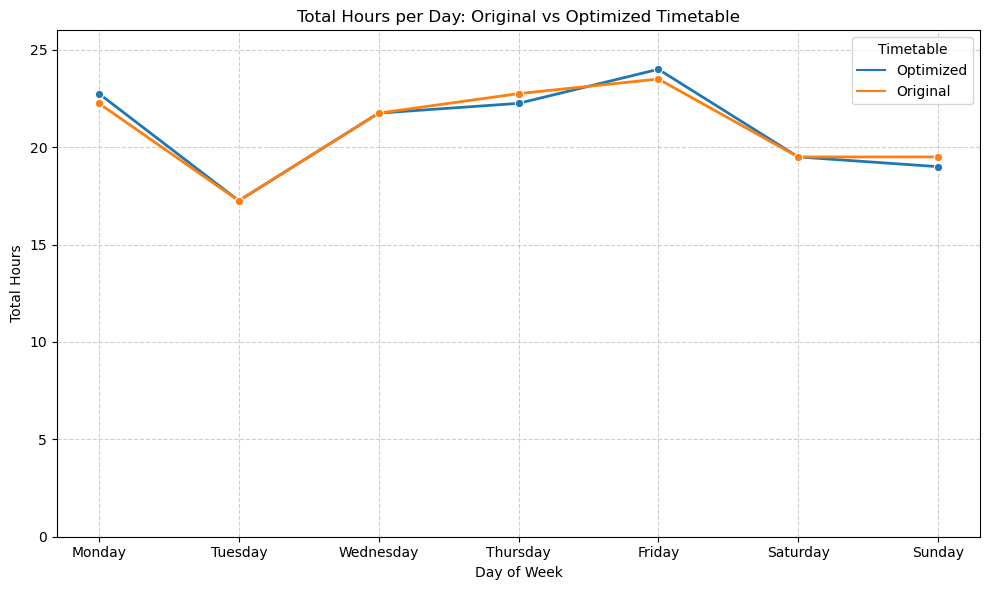

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total hours per day for each timetable
overall_summary = comparison_df.groupby(['day', 'timetable'])['hours'].sum().reset_index()

# To keep days in correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
overall_summary['day'] = pd.Categorical(overall_summary['day'], categories=days_order, ordered=True)
overall_summary = overall_summary.sort_values('day')

plt.figure(figsize=(10,6))
sns.lineplot(data=overall_summary, x='day', y='hours', hue='timetable', marker='o', linewidth=2)

plt.title('Total Hours per Day: Original vs Optimized Timetable')
plt.ylabel('Total Hours')
plt.xlabel('Day of Week')
plt.ylim(0, overall_summary['hours'].max() + 2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Timetable')
plt.tight_layout()
plt.show()

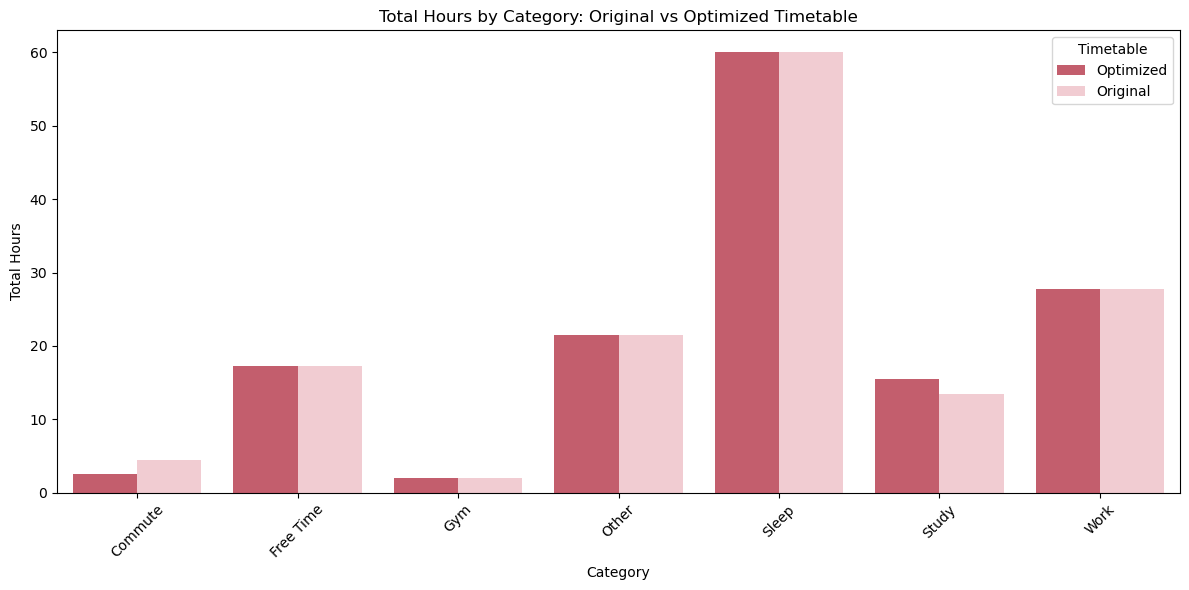

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total hours per category and timetable
category_summary = comparison_df.groupby(['category', 'timetable'])['hours'].sum().reset_index()

plt.figure(figsize=(12,6))

# Pink shades for Original and Optimized
palette = {
    'Original': '#f7c6ce',  # light pink
    'Optimized': '#d44d61'  # deeper pink
}

# Create barplot with hue = timetable
sns.barplot(
    data=category_summary,
    x='category',
    y='hours',
    hue='timetable',
    palette=palette
)

plt.title('Total Hours by Category: Original vs Optimized Timetable')
plt.ylabel('Total Hours')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Timetable')
plt.tight_layout()
plt.show()